<a href="https://colab.research.google.com/github/eomjimin/KDT_HW/blob/main/%EA%B3%BC%EC%A0%9C2_%EB%AF%B8%EA%B5%AD%EC%A7%91%EA%B0%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error

In [108]:
price_df = pd.read_csv('/content/drive/MyDrive/KDT/data/American_Housing_Data_20231209.csv')

In [109]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39981 entries, 0 to 39980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 39981 non-null  int64  
 1   Price                    39981 non-null  float64
 2   Beds                     39981 non-null  int64  
 3   Baths                    39981 non-null  int64  
 4   Living Space             39981 non-null  int64  
 5   Address                  39981 non-null  object 
 6   City                     39981 non-null  object 
 7   State                    39981 non-null  object 
 8   Zip Code Population      39981 non-null  int64  
 9   Zip Code Density         39981 non-null  float64
 10  County                   39981 non-null  object 
 11  Median Household Income  39979 non-null  float64
 12  Latitude                 39981 non-null  float64
 13  Longitude                39981 non-null  float64
dtypes: float64(5), int64(5

# 과제2
영어 | 한글
:---: | :---:
Zip Code | 우편번호
Price | 가격
Beds | 침대 수
Baths | 욕실 수
Living Space | 생활공간 전체 크기
Address | 주소
City | 도시
State | 주
Zip Code Population | 우편번호 내의 인구 수
Zip Code Density | 우편번호 내의 인구 밀도
County | 카운티
Median Household Income | 중위 가구 소득
Latitude | 위도
Longitude | 경도

In [110]:
price_df = price_df.dropna()

In [111]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39979 entries, 0 to 39980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 39979 non-null  int64  
 1   Price                    39979 non-null  float64
 2   Beds                     39979 non-null  int64  
 3   Baths                    39979 non-null  int64  
 4   Living Space             39979 non-null  int64  
 5   Address                  39979 non-null  object 
 6   City                     39979 non-null  object 
 7   State                    39979 non-null  object 
 8   Zip Code Population      39979 non-null  int64  
 9   Zip Code Density         39979 non-null  float64
 10  County                   39979 non-null  object 
 11  Median Household Income  39979 non-null  float64
 12  Latitude                 39979 non-null  float64
 13  Longitude                39979 non-null  float64
dtypes: float64(5), int64(5

In [112]:
price_df.describe()

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
count,39979.000000,3.997900e+04,39979.000000,39979.00000,39979.000000,39979.000000,39979.000000,39979.000000,39979.000000,39979.000000
mean,64832.585632,6.227826e+05,3.171615,2.46652,1901.505090,37728.089297,2379.531517,110837.259861,36.435546,-98.080246
std,25614.988511,9.470026e+05,1.308752,1.32305,1211.321442,18671.207769,2946.600433,47309.055715,4.446940,15.061450
min,10013.000000,1.800000e+03,1.000000,1.00000,2.000000,39.000000,0.600000,27475.000000,25.729830,-122.826870
25%,40215.000000,2.650000e+05,3.000000,2.00000,1200.000000,24465.000000,902.400000,76640.000000,33.239850,-111.636310
50%,74136.000000,3.999000e+05,3.000000,2.00000,1639.000000,35049.000000,1588.700000,100405.000000,36.166620,-96.839530
75%,85730.000000,6.749900e+05,4.000000,3.00000,2265.000000,46835.000000,2736.800000,135075.000000,39.283090,-85.656980
max,98199.000000,3.800000e+07,54.000000,66.00000,74340.000000,116469.000000,58289.600000,900203.000000,47.742370,-73.704510


In [113]:
price_df[price_df['Zip Code Density'] == 58289.600000	]

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
12,10028,725000.0,1,1,950,33 E END AVE # M3,New York,New York,47793,58289.6,New York,270845.0,40.77643,-73.95339


<ipython-input-114-3abb003bf2ac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(price_df.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)


<Axes: >

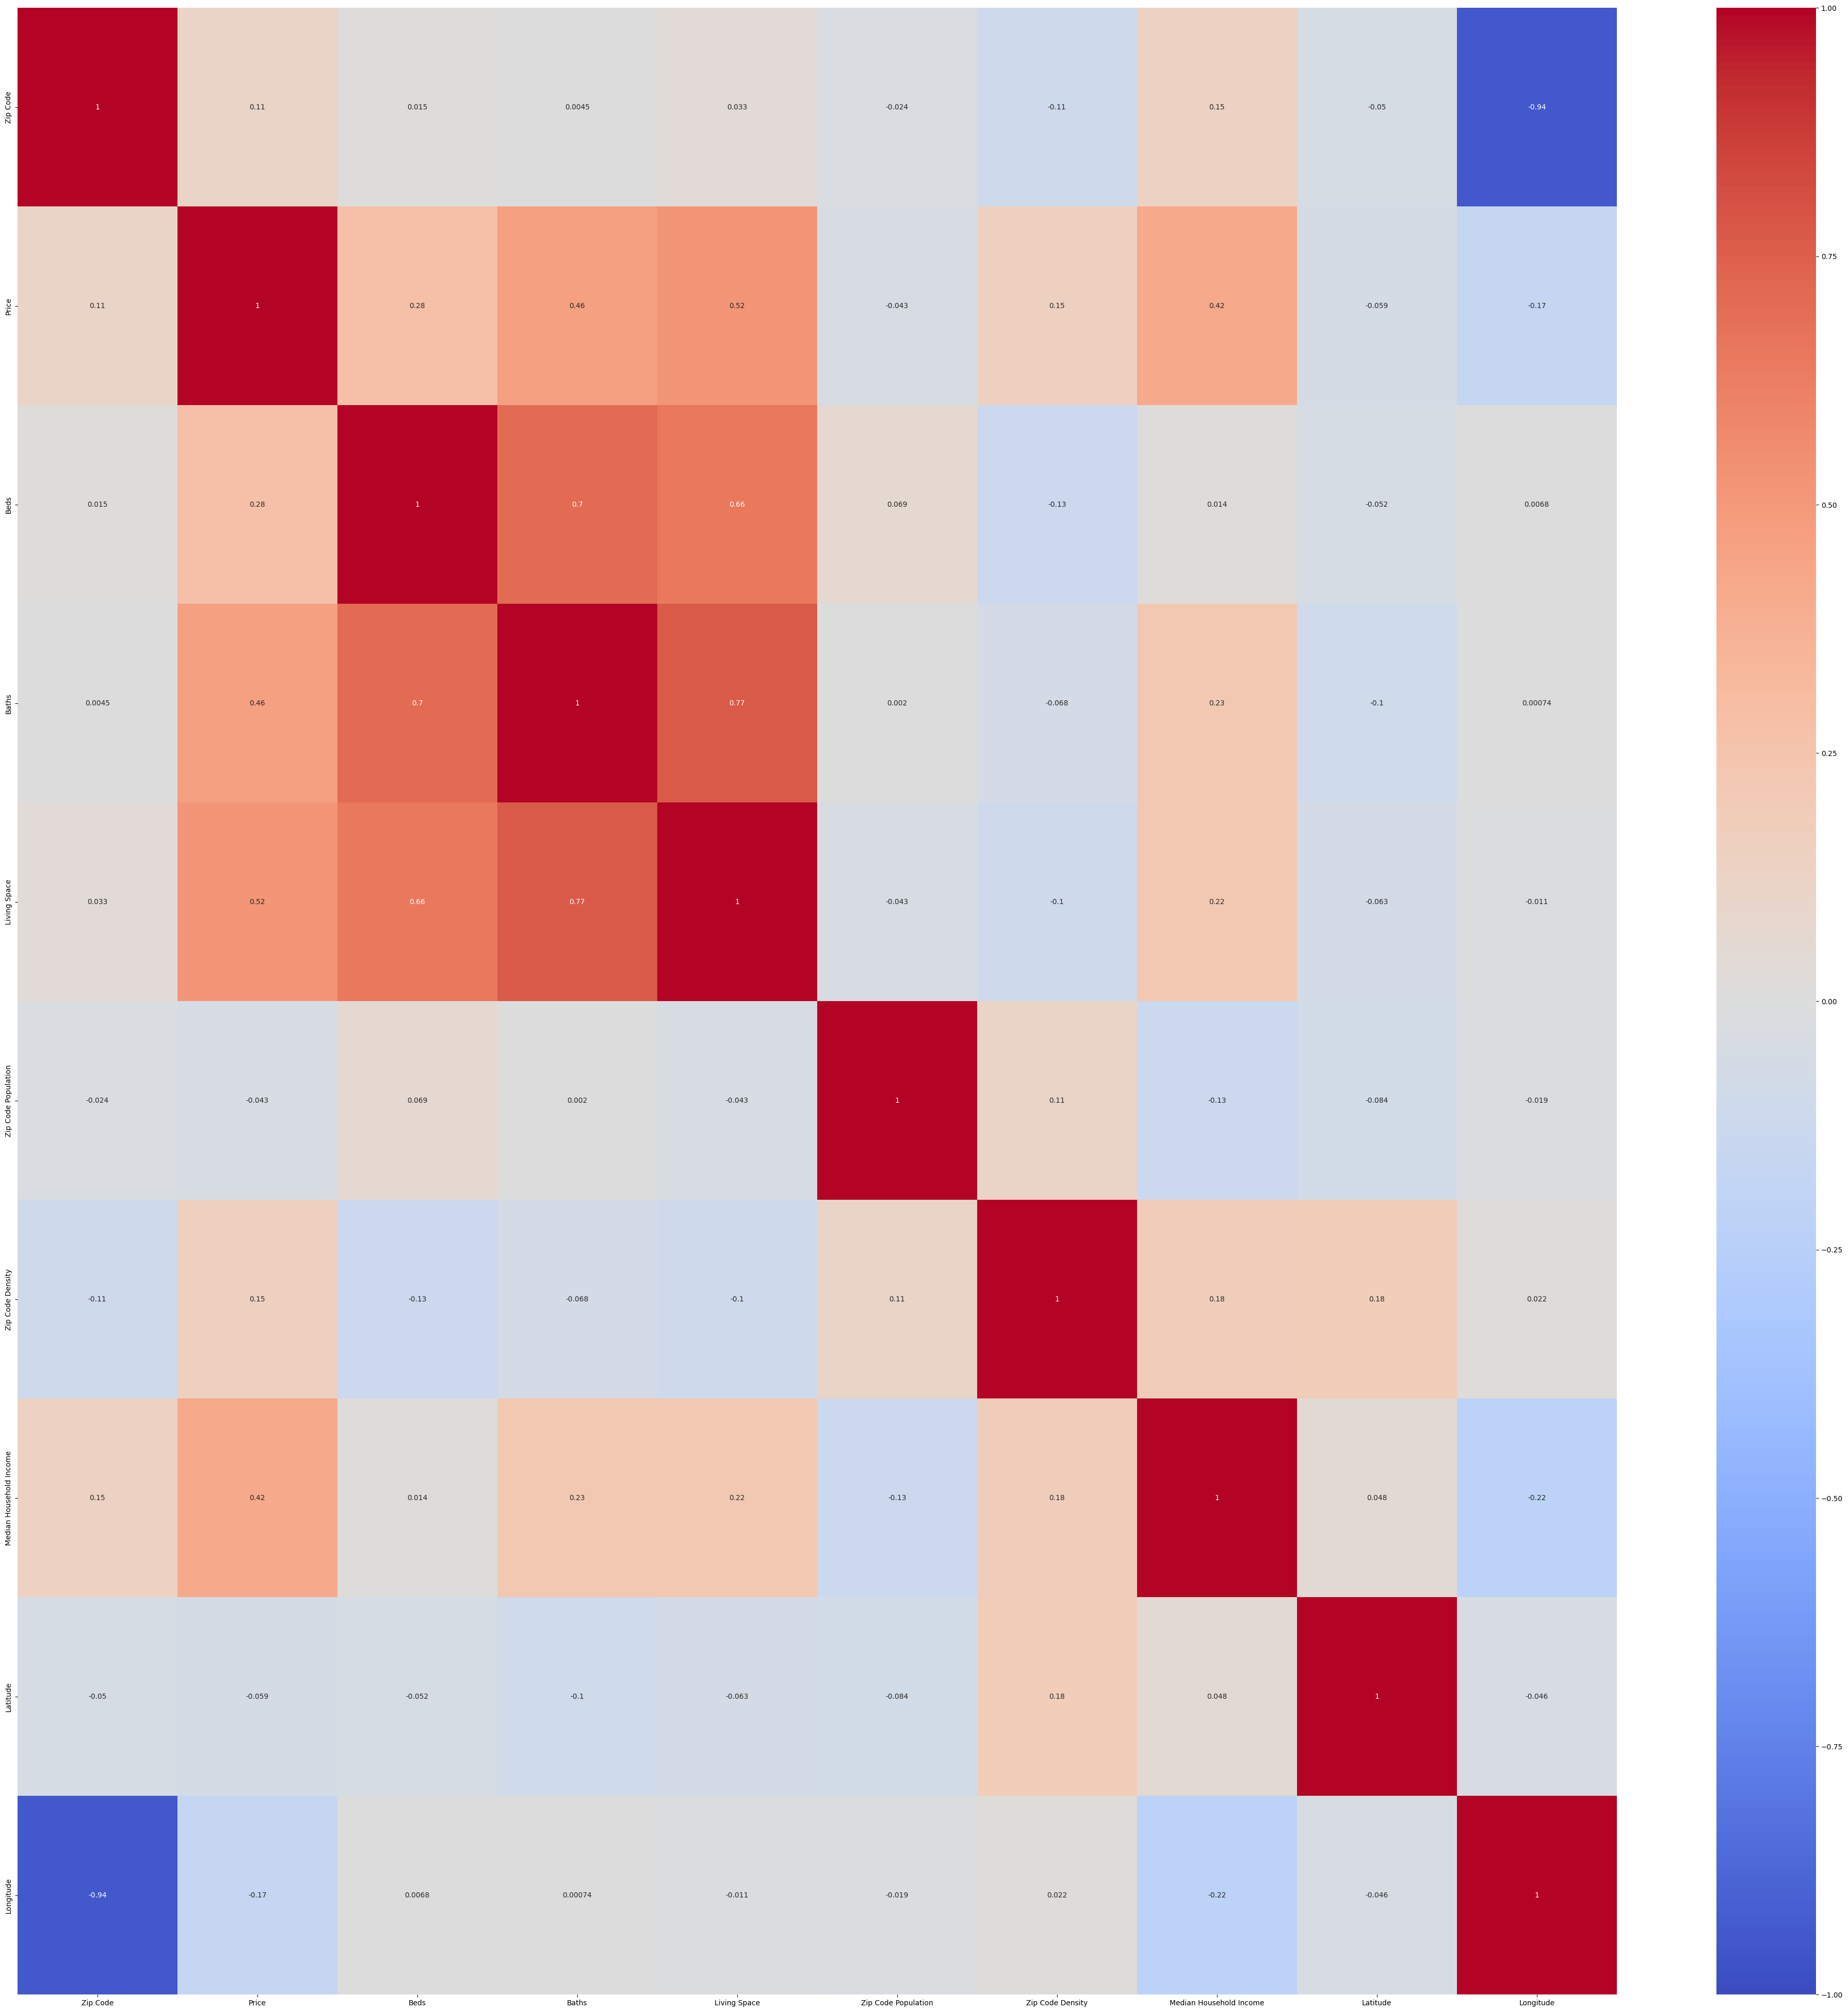

In [114]:
plt.figure(figsize=(10 ,10))
sns.heatmap(price_df.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)

<Axes: ylabel='Price'>

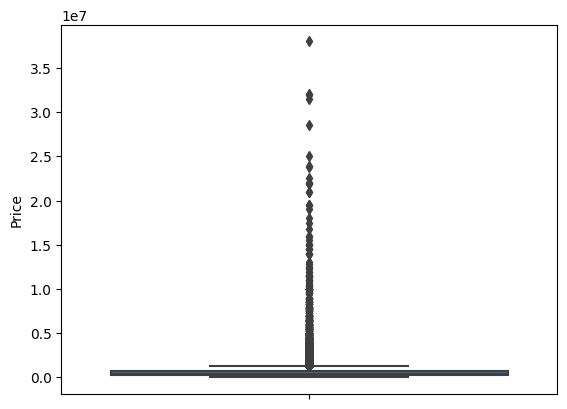

In [115]:
sns.boxplot(y=price_df['Price'])

In [116]:
price_df['Price'].sort_values(ascending=False)

32369    38000000.0
35645    32000000.0
1629     31900000.0
7665     31500000.0
32634    28500000.0
            ...    
112          2200.0
18133        2000.0
34393        1995.0
7928         1950.0
94           1800.0
Name: Price, Length: 39979, dtype: float64

In [117]:
print(len(price_df[price_df['Price'] > 2695000.0]))

842


In [118]:
price_df = price_df[price_df['Price'] < 2690000]

<Axes: ylabel='Beds'>

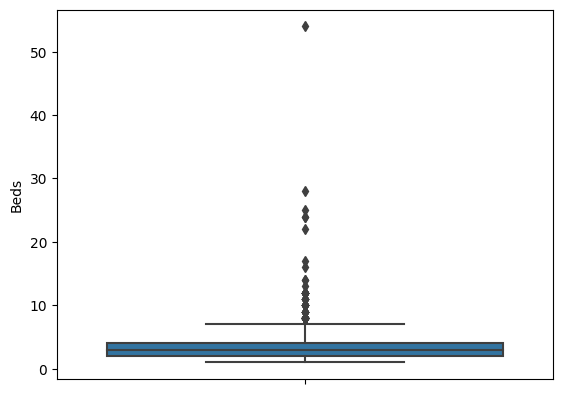

In [119]:
sns.boxplot(y=price_df['Beds'])

In [120]:
price_df = price_df[price_df['Beds'] < 5]

In [121]:
price_df.describe()

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
count,35924.000000,3.592400e+04,35924.000000,35924.000000,35924.000000,35924.000000,35924.000000,35924.000000,35924.000000,35924.000000
mean,64707.332090,4.946989e+05,2.922614,2.260439,1696.156330,37867.358201,2358.010578,108262.861903,36.457953,-97.983792
std,25548.119591,3.909874e+05,0.841219,0.908737,852.735034,18690.342199,2898.880224,44980.619991,4.453285,15.007065
min,10014.000000,1.800000e+03,1.000000,1.000000,2.000000,39.000000,0.600000,27475.000000,25.729830,-122.826870
25%,40215.000000,2.500000e+05,2.000000,2.000000,1164.750000,24700.000000,906.100000,75391.000000,33.239850,-111.634760
50%,74134.000000,3.790000e+05,3.000000,2.000000,1560.000000,35163.000000,1597.500000,98519.000000,36.167890,-96.795420
75%,85716.000000,5.990000e+05,4.000000,3.000000,2054.000000,46908.000000,2700.600000,130735.000000,39.285090,-85.655970
max,98199.000000,2.688000e+06,4.000000,21.000000,74340.000000,116469.000000,58289.600000,389928.000000,47.742370,-73.704510


<Axes: ylabel='Baths'>

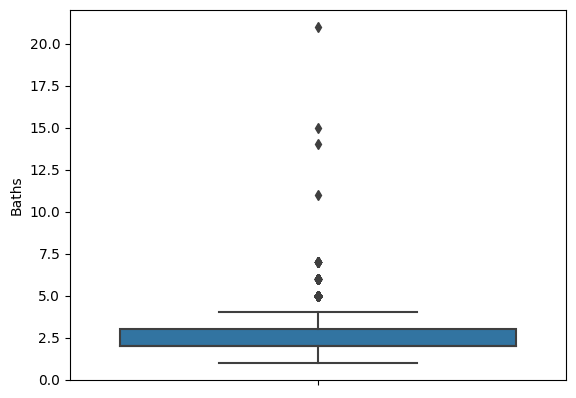

In [122]:
sns.boxplot(y=price_df['Baths'])

In [123]:
price_df = price_df[price_df['Baths'] <= 4]
price_df.describe()

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
count,35436.000000,3.543600e+04,35436.000000,35436.000000,35436.000000,35436.000000,35436.000000,35436.000000,35436.000000,35436.000000
mean,64757.403714,4.835514e+05,2.909894,2.218902,1665.375607,37941.541088,2365.388811,107861.491224,36.469656,-98.027844
std,25569.054541,3.751359e+05,0.838762,0.833356,804.916495,18708.900455,2908.792493,44749.720276,4.460703,15.039836
min,10014.000000,1.800000e+03,1.000000,1.000000,14.000000,39.000000,0.600000,27475.000000,25.729830,-122.826870
25%,40216.000000,2.500000e+05,2.000000,2.000000,1160.000000,24737.000000,907.000000,75113.000000,33.239850,-111.634760
50%,74135.000000,3.750000e+05,3.000000,2.000000,1548.000000,35172.000000,1603.800000,98188.000000,36.172790,-96.813150
75%,85719.000000,5.890000e+05,4.000000,3.000000,2028.250000,47081.000000,2716.600000,130531.000000,39.294870,-85.655430
max,98199.000000,2.688000e+06,4.000000,4.000000,74340.000000,116469.000000,58289.600000,389928.000000,47.742370,-73.704510


<Axes: ylabel='Living Space'>

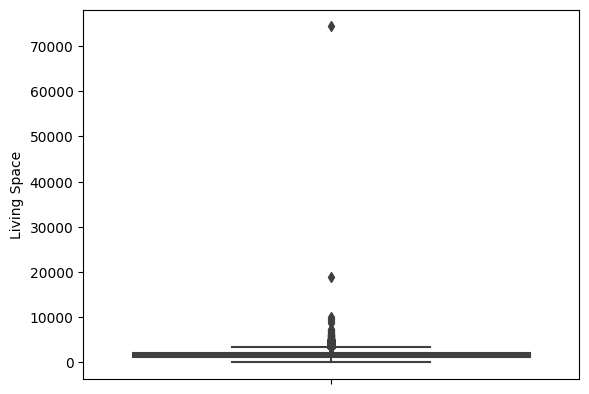

In [124]:
sns.boxplot(y=price_df['Living Space'])

In [125]:
price_df = price_df[price_df['Living Space'] < 4000]
price_df.describe()

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
count,35186.000000,3.518600e+04,35186.000000,35186.000000,35186.000000,35186.000000,35186.000000,35186.000000,35186.000000,35186.000000
mean,64760.627579,4.792928e+05,2.904564,2.209259,1642.474706,37987.864349,2370.988993,107681.159382,36.468865,-98.042616
std,25594.220192,3.700595e+05,0.837645,0.826040,655.638042,18724.014509,2915.231731,44680.145571,4.463628,15.061228
min,10014.000000,1.800000e+03,1.000000,1.000000,14.000000,39.000000,0.600000,27475.000000,25.729830,-122.826870
25%,40216.000000,2.500000e+05,2.000000,2.000000,1156.000000,24753.000000,911.400000,75093.000000,33.239850,-111.636310
50%,74135.000000,3.750000e+05,3.000000,2.000000,1540.000000,35199.000000,1604.000000,97828.000000,36.173670,-96.819425
75%,85730.000000,5.800000e+05,3.000000,3.000000,2015.000000,47158.000000,2718.800000,130317.000000,39.297050,-85.655430
max,98199.000000,2.688000e+06,4.000000,4.000000,3998.000000,116469.000000,58289.600000,389928.000000,47.742370,-73.704510


In [126]:
price_df = price_df[price_df['Living Space'] >= 900]

<Axes: ylabel='Median Household Income'>

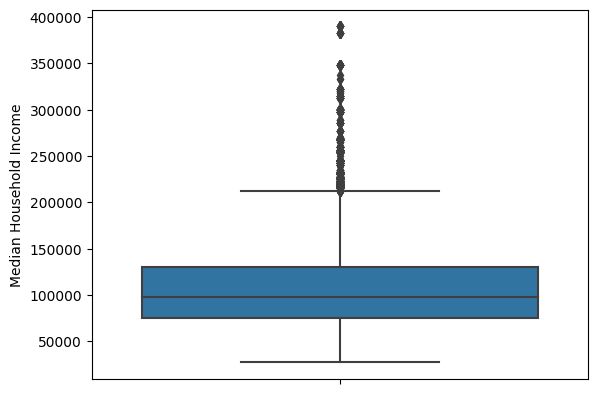

In [127]:
sns.boxplot(y=price_df['Median Household Income'])

In [128]:
price_df = price_df[price_df['Median Household Income'] < 200000]
price_df.describe()

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
count,30379.000000,3.037900e+04,30379.000000,30379.000000,30379.000000,30379.000000,30379.000000,30379.000000,30379.000000,30379.000000
mean,64374.443365,4.700693e+05,3.054380,2.313769,1735.709108,38683.772211,2114.417413,101928.941144,36.352338,-97.556900
std,25200.431546,3.427998e+05,0.720279,0.776175,605.488376,18829.039073,2368.153829,34940.884888,4.396649,14.644119
min,10026.000000,1.950000e+03,1.000000,1.000000,900.000000,39.000000,0.600000,27475.000000,25.729830,-122.826870
25%,40217.000000,2.597000e+05,3.000000,2.000000,1264.000000,25497.000000,864.300000,74702.000000,32.931010,-110.976450
50%,74127.000000,3.749000e+05,3.000000,2.000000,1611.000000,35886.000000,1499.000000,96211.000000,36.112890,-96.770320
75%,85212.000000,5.740810e+05,4.000000,3.000000,2070.000000,48148.000000,2458.100000,124683.000000,39.284210,-85.617940
max,98178.000000,2.688000e+06,4.000000,4.000000,3998.000000,116469.000000,39689.700000,199640.000000,47.742370,-73.704510


In [129]:
print(len(price_df[price_df['Median Household Income'] < 200000]))

30379


In [130]:
print(len(price_df[price_df['Living Space'] >= 900]))

30379


In [131]:
price_df.describe()

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
count,30379.000000,3.037900e+04,30379.000000,30379.000000,30379.000000,30379.000000,30379.000000,30379.000000,30379.000000,30379.000000
mean,64374.443365,4.700693e+05,3.054380,2.313769,1735.709108,38683.772211,2114.417413,101928.941144,36.352338,-97.556900
std,25200.431546,3.427998e+05,0.720279,0.776175,605.488376,18829.039073,2368.153829,34940.884888,4.396649,14.644119
min,10026.000000,1.950000e+03,1.000000,1.000000,900.000000,39.000000,0.600000,27475.000000,25.729830,-122.826870
25%,40217.000000,2.597000e+05,3.000000,2.000000,1264.000000,25497.000000,864.300000,74702.000000,32.931010,-110.976450
50%,74127.000000,3.749000e+05,3.000000,2.000000,1611.000000,35886.000000,1499.000000,96211.000000,36.112890,-96.770320
75%,85212.000000,5.740810e+05,4.000000,3.000000,2070.000000,48148.000000,2458.100000,124683.000000,39.284210,-85.617940
max,98178.000000,2.688000e+06,4.000000,4.000000,3998.000000,116469.000000,39689.700000,199640.000000,47.742370,-73.704510


In [132]:
price_df.drop(['Zip Code','Beds','Address', 'City', 'County', 'Zip Code Population', 'Zip Code Density','Latitude', 'Longitude'], axis=1, inplace=True)

In [133]:
price_df['State'].nunique()

29

In [134]:
price_df = pd.get_dummies(price_df, columns=['State'])

In [135]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30379 entries, 10 to 39946
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       30379 non-null  float64
 1   Baths                       30379 non-null  int64  
 2   Living Space                30379 non-null  int64  
 3   Median Household Income     30379 non-null  float64
 4   State_Arizona               30379 non-null  uint8  
 5   State_California            30379 non-null  uint8  
 6   State_Colorado              30379 non-null  uint8  
 7   State_District of Columbia  30379 non-null  uint8  
 8   State_Florida               30379 non-null  uint8  
 9   State_Georgia               30379 non-null  uint8  
 10  State_Illinois              30379 non-null  uint8  
 11  State_Indiana               30379 non-null  uint8  
 12  State_Kansas                30379 non-null  uint8  
 13  State_Kentucky              30

# 1. Price 종속변수

In [136]:
rs = RobustScaler()

X = price_df.drop("Price", axis=1)
y = price_df["Price"]

Xrs = rs.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xrs, y, test_size=0.2, random_state=2023)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(24303, 32) (24303,)
(6076, 32) (6076,)


In [137]:
my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato']

def plot_predictions(name_, pred, actual):
  df = pd.DataFrame({'prediction': pred, 'actual': y_test})
  df = df.sort_values(by='actual').reset_index(drop=True)
  plt.figure(figsize=(12, 9))
  plt.scatter(df.index, df['prediction'], marker='x', color='r')
  plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
  plt.title(name_, fontsize=15)
  plt.legend(['prediction', 'actual'], fontsize=12)
  plt.show()

def mse_eval(name_, pred, actual):
  global my_predictions
  global colors
  plot_predictions(name_, pred, actual)
  mse = mean_squared_error(pred, actual)
  my_predictions[name_] = mse
  y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
  df = pd.DataFrame(y_value, columns=['model', 'mse'])
  print(df)
  min_ = df['mse'].min() - 10
  max_ = df['mse'].max() + 10
  length = len(df)
  plt.figure(figsize=(10, length))
  ax = plt.subplot()
  ax.set_yticks(np.arange(len(df)))
  ax.set_yticklabels(df['model'], fontsize=15)
  bars = ax.barh(np.arange(len(df)), df['mse'])
  for i, v in enumerate(df['mse']):
    idx = np.random.choice(len(colors))
    bars[i].set_color(colors[idx])
    ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
  plt.title('MSE Error', fontsize=18)
  plt.xlim(min_, max_)
  plt.show()

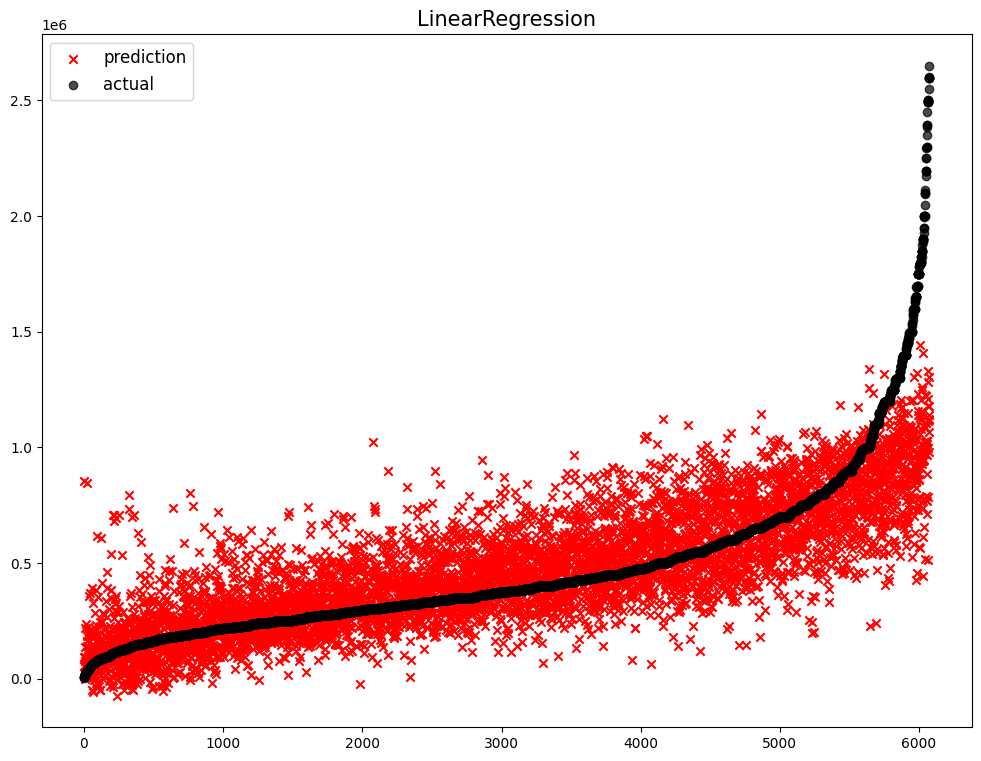

              model           mse
0  LinearRegression  5.290521e+10


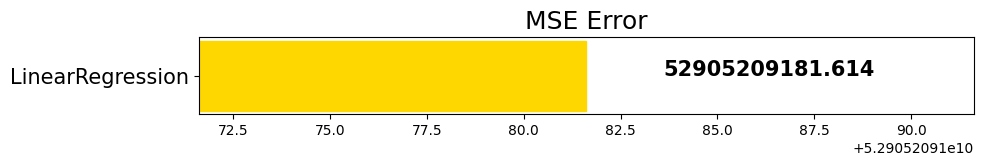

In [138]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
rs_lr = np.sqrt(mean_squared_error(y_test, lr_pred))
mse_eval("LinearRegression", lr_pred, y_test)


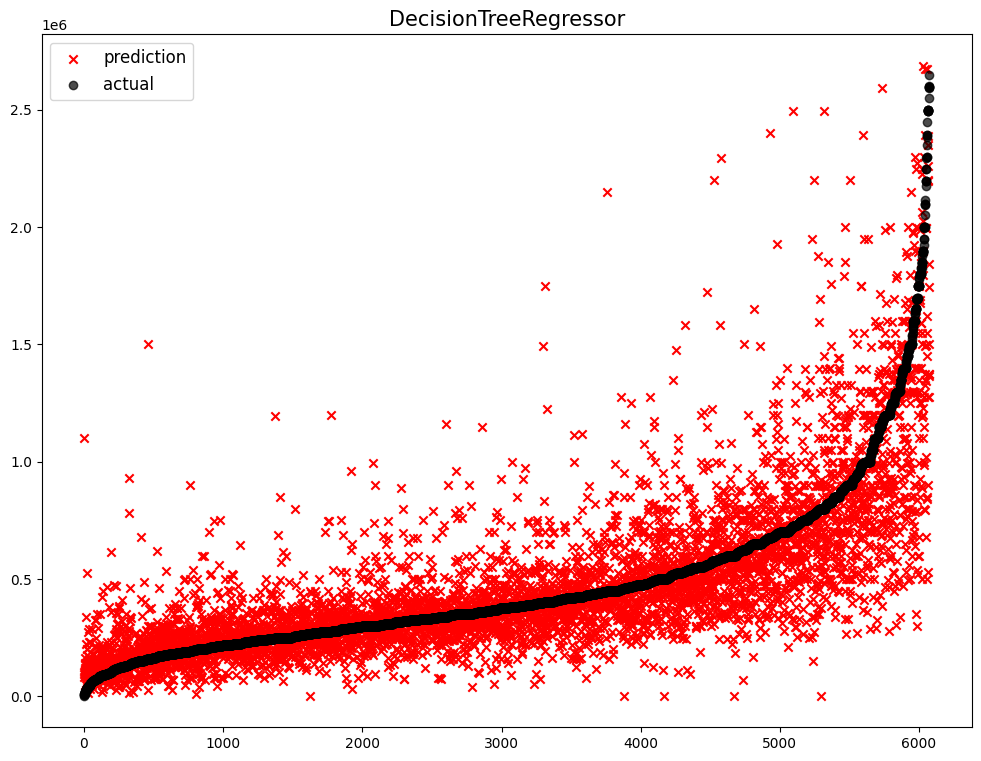

                   model           mse
0       LinearRegression  5.290521e+10
1  DecisionTreeRegressor  5.075069e+10


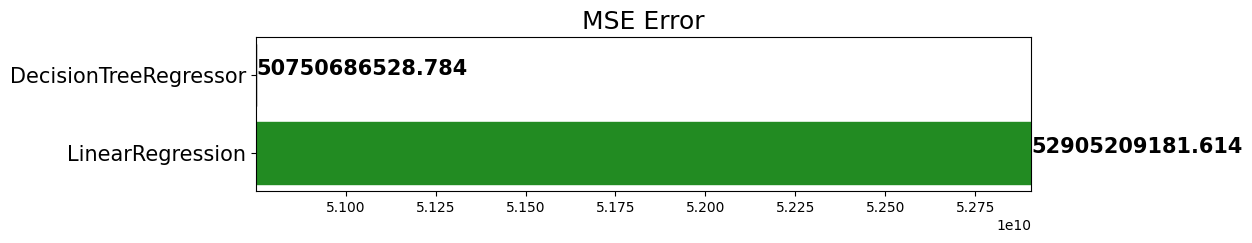

In [139]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
rs_dt = np.sqrt(mean_squared_error(y_test, dt_pred))

mse_eval("DecisionTreeRegressor", dt_pred, y_test)

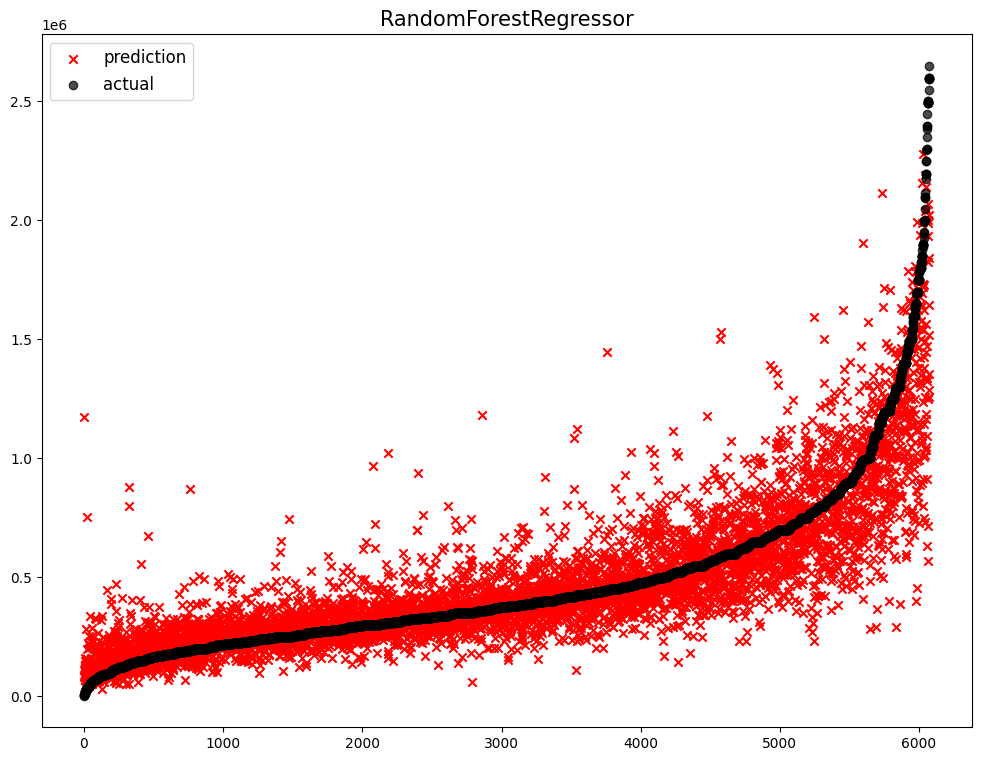

                   model           mse
0       LinearRegression  5.290521e+10
1  DecisionTreeRegressor  5.075069e+10
2  RandomForestRegressor  3.131624e+10


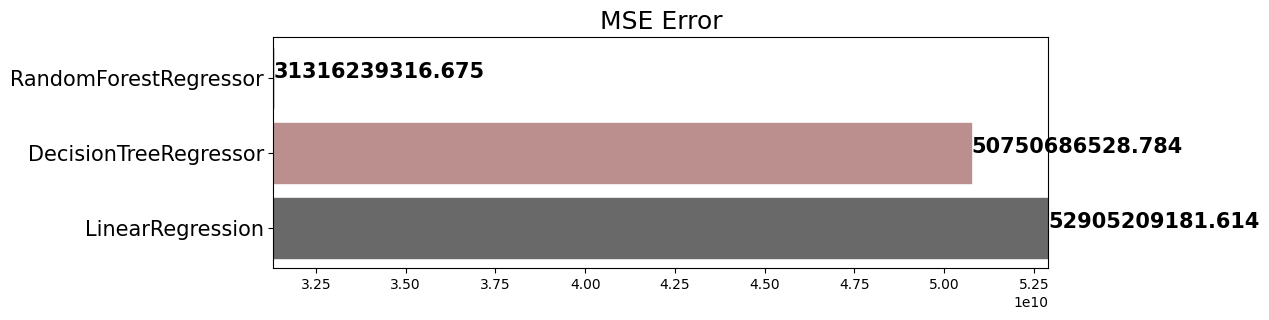

In [140]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rs_rf = np.sqrt(mean_squared_error(y_test, rf_pred))

mse_eval("RandomForestRegressor", rf_pred, y_test)

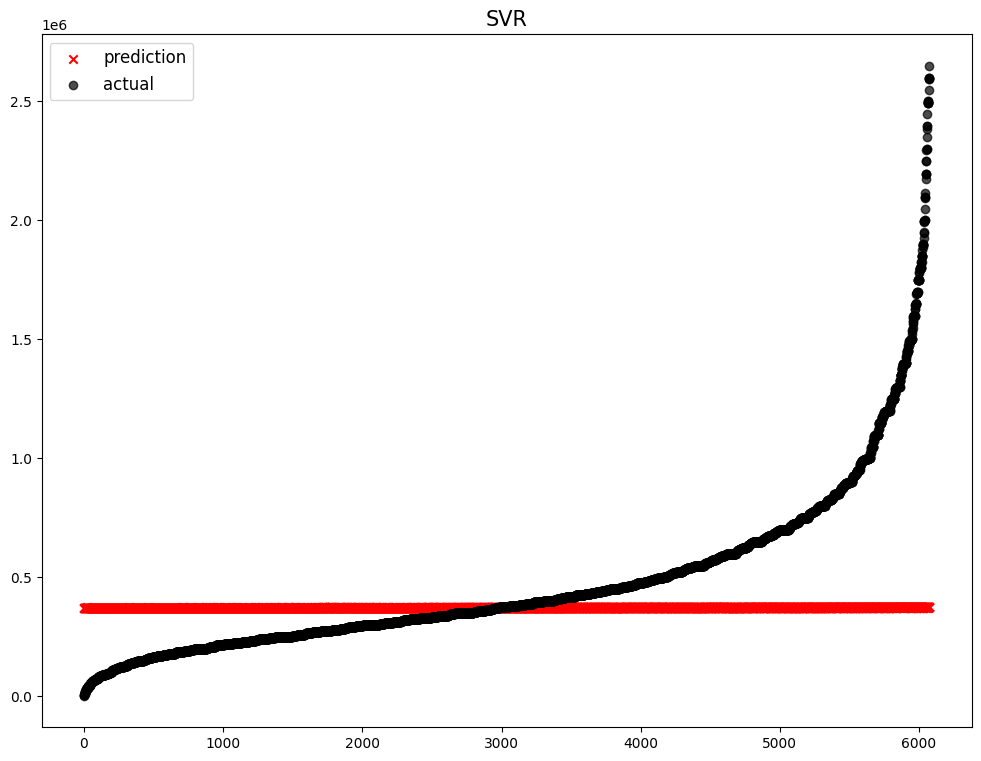

                   model           mse
0                    SVR  1.316502e+11
1       LinearRegression  5.290521e+10
2  DecisionTreeRegressor  5.075069e+10
3  RandomForestRegressor  3.131624e+10


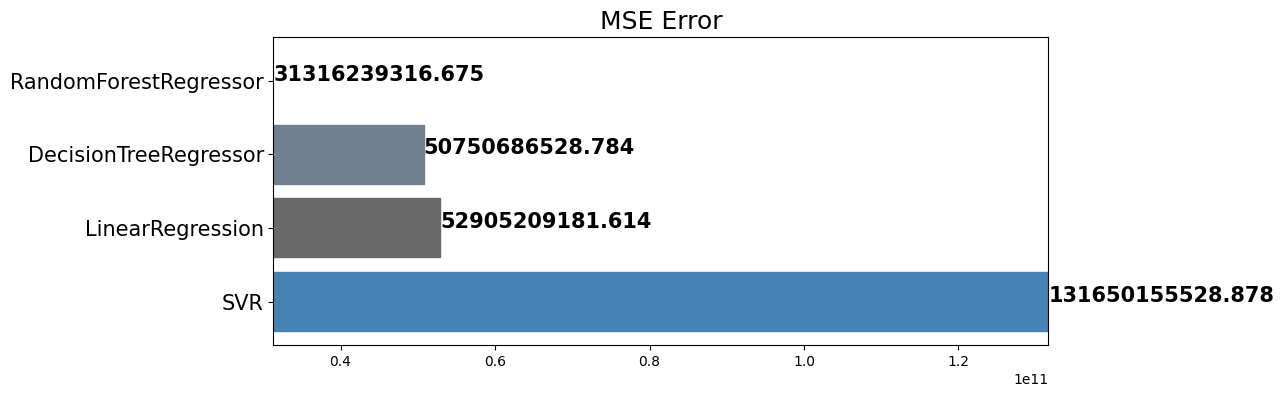

In [141]:
from sklearn.svm import SVR

sr = SVR()

sr.fit(X_train, y_train)
sr_pred = sr.predict(X_test)
rs_sr = np.sqrt(mean_squared_error(y_test, sr_pred))

mse_eval("SVR", sr_pred, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001926 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 572
[LightGBM] [Info] Number of data points in the train set: 24303, number of used features: 32
[LightGBM] [Info] Start training from score 468736.099700


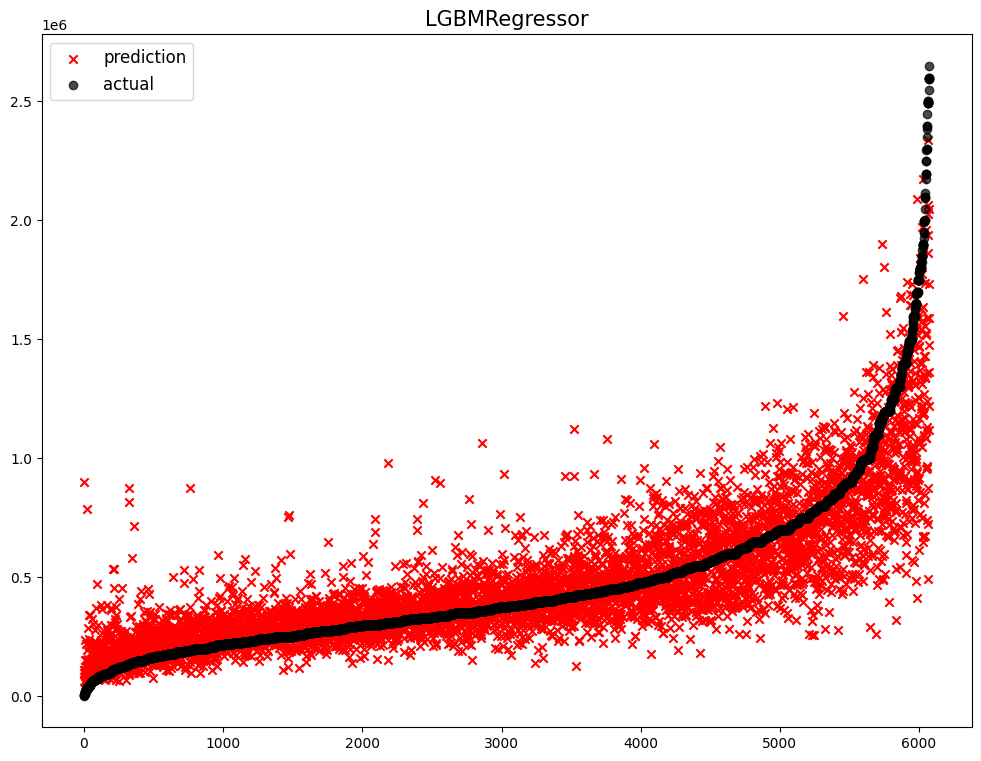

                   model           mse
0                    SVR  1.316502e+11
1       LinearRegression  5.290521e+10
2  DecisionTreeRegressor  5.075069e+10
3          LGBMRegressor  3.477985e+10
4  RandomForestRegressor  3.131624e+10


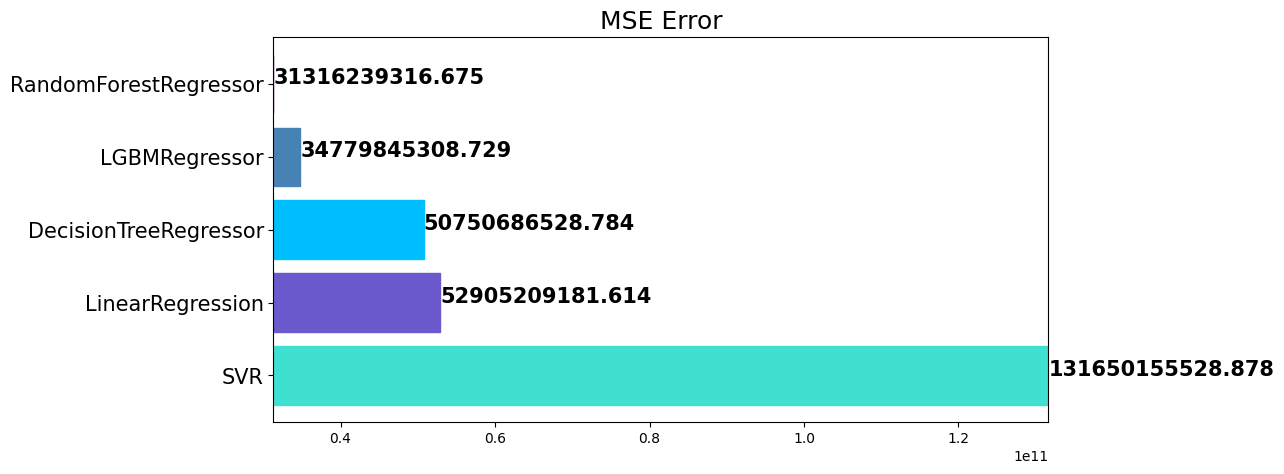

In [142]:
from lightgbm import LGBMRegressor

lg = LGBMRegressor()

lg.fit(X_train, y_train)
lg_pred = lg.predict(X_test)
rs_lg = np.sqrt(mean_squared_error(y_test, lg_pred))

mse_eval("LGBMRegressor", lg_pred, y_test)

# 2. Living Space 종속변수

In [143]:
rs = RobustScaler()

X = price_df.drop("Living Space", axis=1)
y = price_df["Living Space"]

Xrs = rs.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xrs, y, test_size=0.2, random_state=2023)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(24303, 32) (24303,)
(6076, 32) (6076,)


In [144]:
my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato']

def plot_predictions(name_, pred, actual):
  df = pd.DataFrame({'prediction': pred, 'actual': y_test})
  df = df.sort_values(by='actual').reset_index(drop=True)
  plt.figure(figsize=(12, 9))
  plt.scatter(df.index, df['prediction'], marker='x', color='r')
  plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
  plt.title(name_, fontsize=15)
  plt.legend(['prediction', 'actual'], fontsize=12)
  plt.show()

def mse_eval(name_, pred, actual):
  global my_predictions
  global colors
  plot_predictions(name_, pred, actual)
  mse = mean_squared_error(pred, actual)
  my_predictions[name_] = mse
  y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
  df = pd.DataFrame(y_value, columns=['model', 'mse'])
  print(df)
  min_ = df['mse'].min() - 10
  max_ = df['mse'].max() + 10
  length = len(df)
  plt.figure(figsize=(10, length))
  ax = plt.subplot()
  ax.set_yticks(np.arange(len(df)))
  ax.set_yticklabels(df['model'], fontsize=15)
  bars = ax.barh(np.arange(len(df)), df['mse'])
  for i, v in enumerate(df['mse']):
    idx = np.random.choice(len(colors))
    bars[i].set_color(colors[idx])
    ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
  plt.title('MSE Error', fontsize=18)
  plt.xlim(min_, max_)
  plt.show()

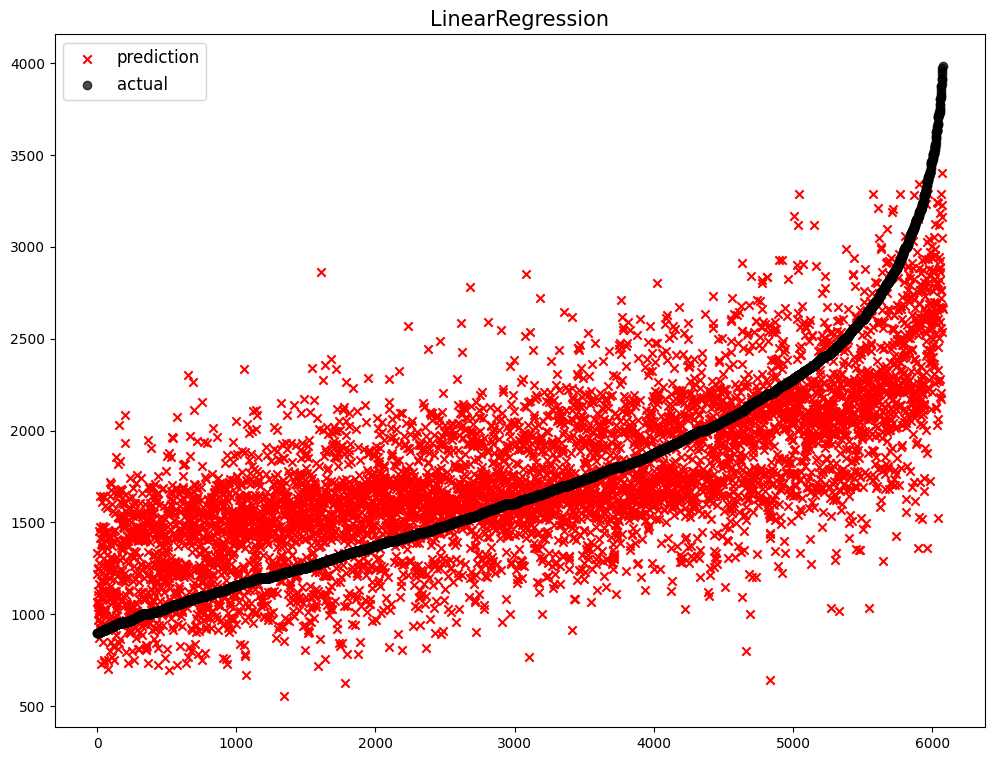

              model            mse
0  LinearRegression  173966.186195


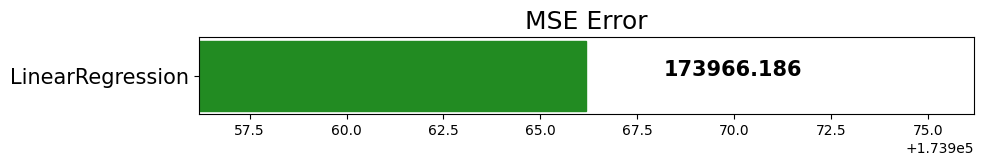

In [145]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
rs_lr = np.sqrt(mean_squared_error(y_test, lr_pred))
mse_eval("LinearRegression", lr_pred, y_test)

In [146]:
lr_pred

array([1483.4453125 , 2412.5625    , 1335.60546875, ..., 2182.73828125,
       1593.796875  , 1203.7578125 ])

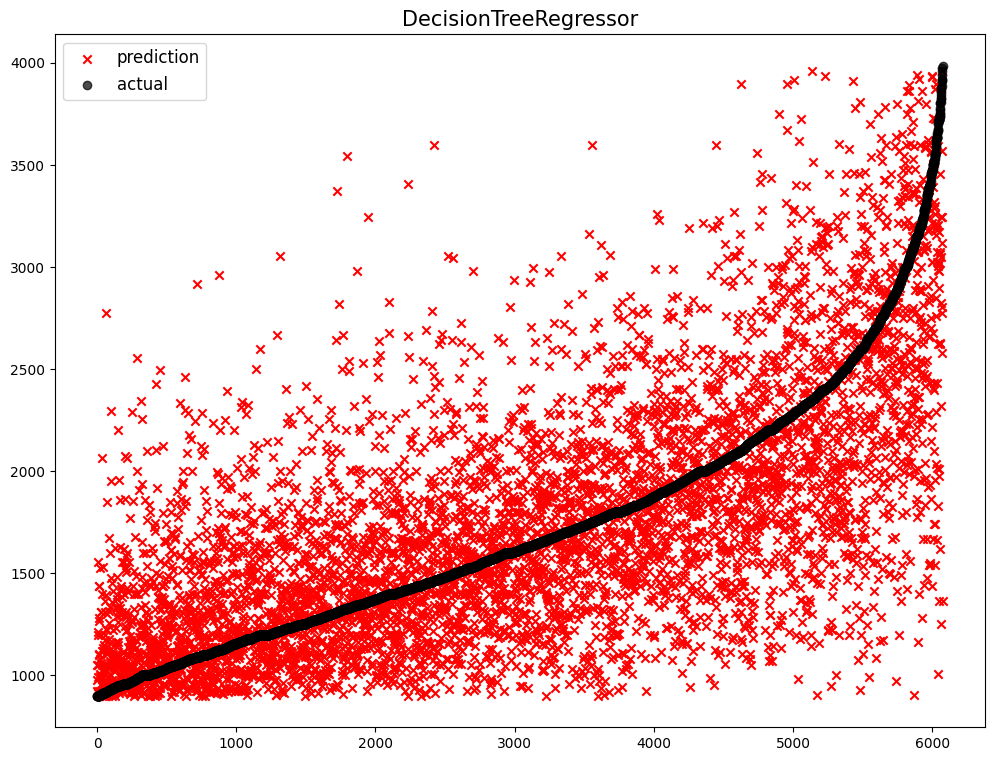

                   model            mse
0  DecisionTreeRegressor  226178.390672
1       LinearRegression  173966.186195


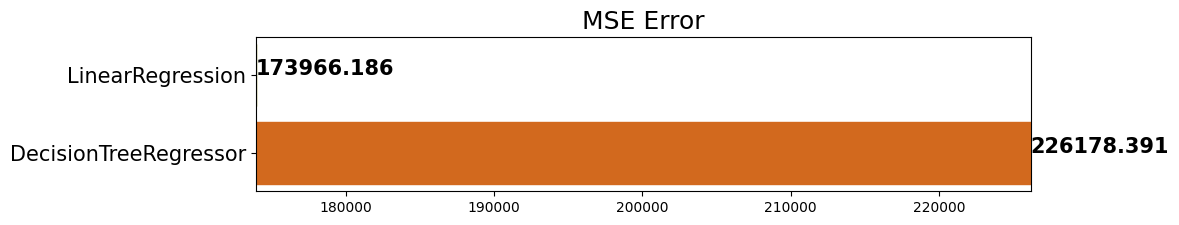

In [147]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
rs_dt = np.sqrt(mean_squared_error(y_test, dt_pred))

mse_eval("DecisionTreeRegressor", dt_pred, y_test)

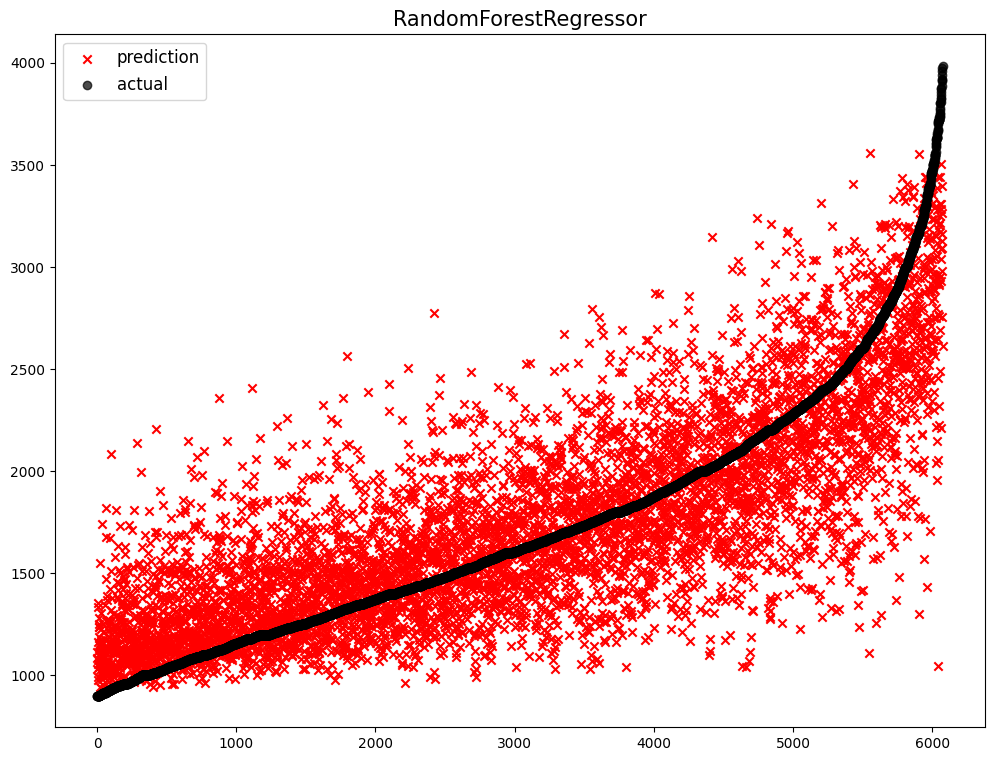

                   model            mse
0  DecisionTreeRegressor  226178.390672
1       LinearRegression  173966.186195
2  RandomForestRegressor  129641.438709


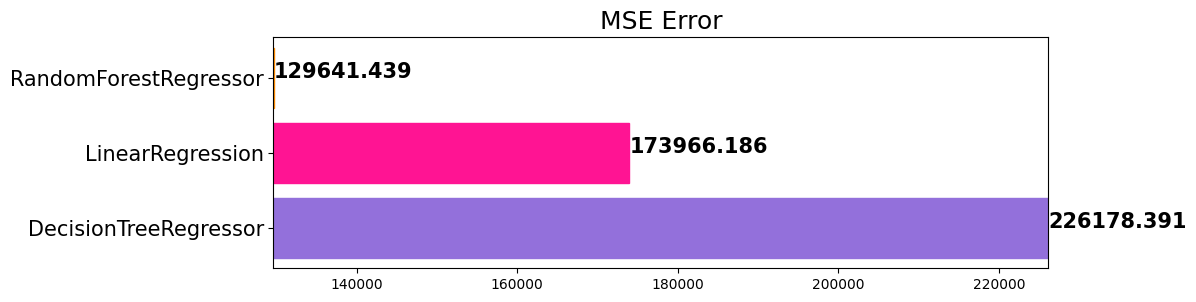

In [148]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rs_rf = np.sqrt(mean_squared_error(y_test, rf_pred))

mse_eval("RandomForestRegressor", rf_pred, y_test)

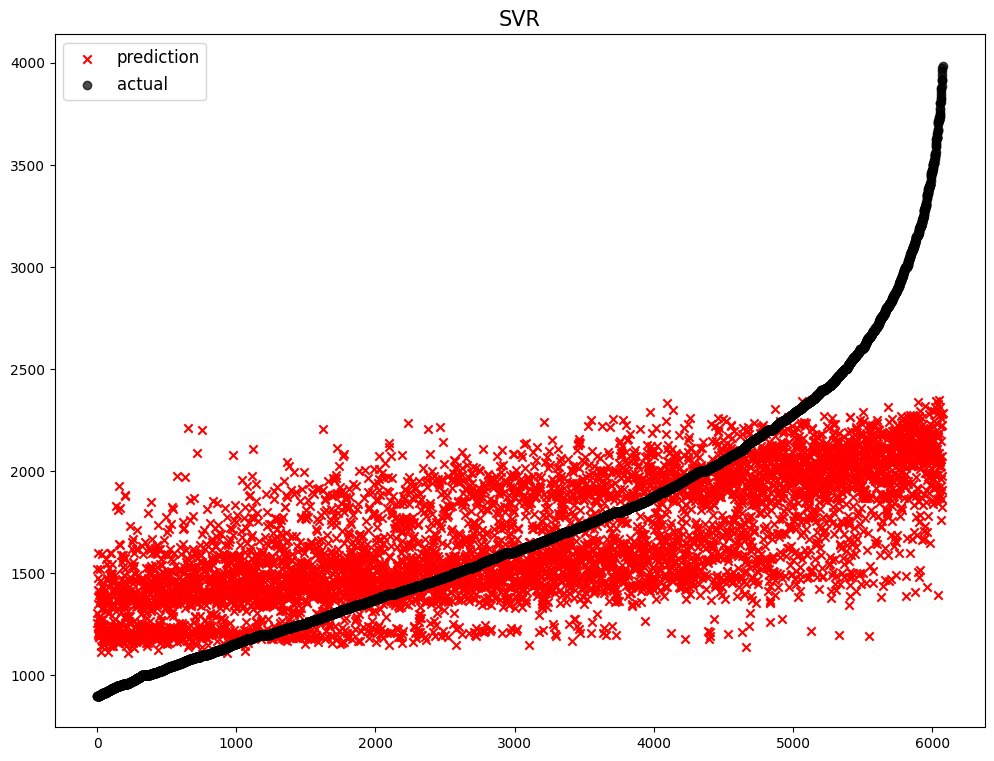

                   model            mse
0  DecisionTreeRegressor  226178.390672
1                    SVR  211444.813151
2       LinearRegression  173966.186195
3  RandomForestRegressor  129641.438709


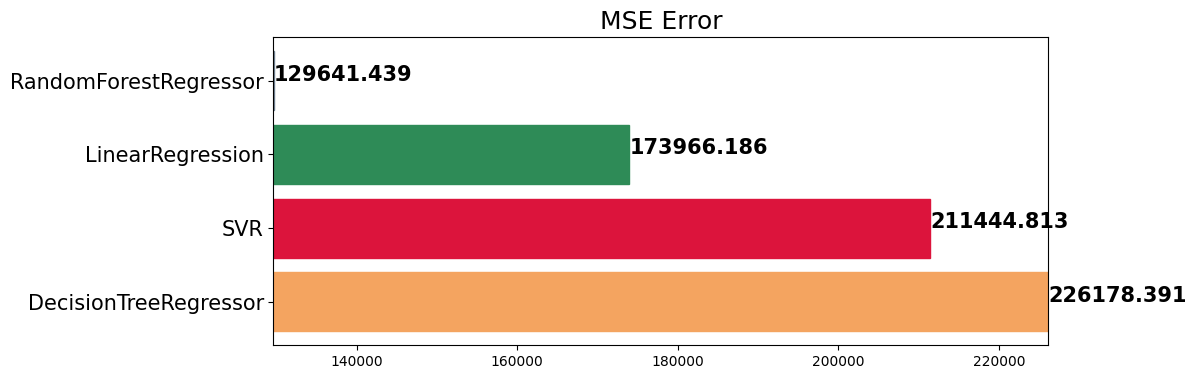

In [149]:
from sklearn.svm import SVR

sr = SVR()

sr.fit(X_train, y_train)
sr_pred = sr.predict(X_test)
rs_sr = np.sqrt(mean_squared_error(y_test, sr_pred))

mse_eval("SVR", sr_pred, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 572
[LightGBM] [Info] Number of data points in the train set: 24303, number of used features: 32
[LightGBM] [Info] Start training from score 1735.976916


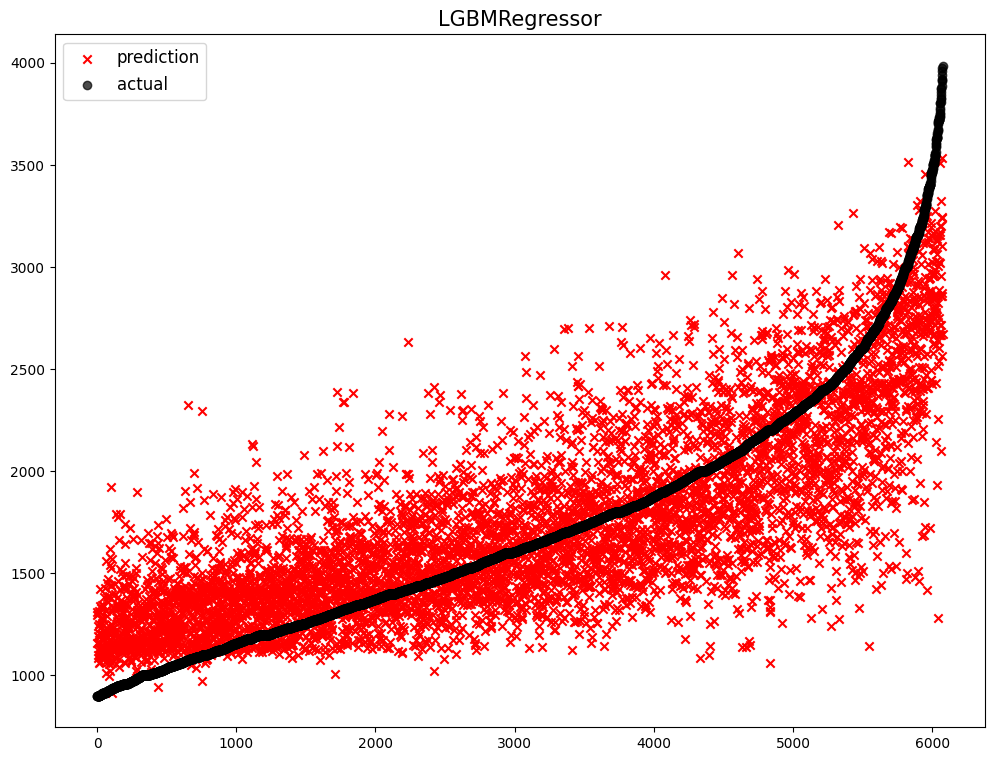

                   model            mse
0  DecisionTreeRegressor  226178.390672
1                    SVR  211444.813151
2       LinearRegression  173966.186195
3  RandomForestRegressor  129641.438709
4          LGBMRegressor  127902.655929


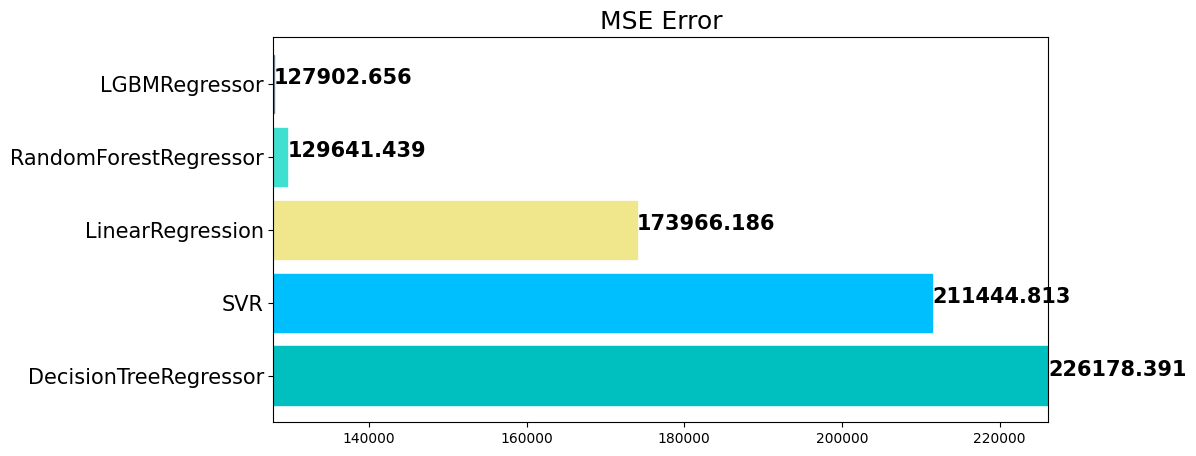

In [150]:
from lightgbm import LGBMRegressor

lg = LGBMRegressor()

lg.fit(X_train, y_train)
lg_pred = lg.predict(X_test)
rs_lg = np.sqrt(mean_squared_error(y_test, lg_pred))

mse_eval("LGBMRegressor", lg_pred, y_test)